In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v1.lstm_normalize import get_lstm_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER, DJI_TICKER
import numpy as np

---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 210625 (822.75 KB)
Trainable params: 210625 (822.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

## For **train_model** function

In [4]:
train, test, predict = get_lstm_data(DJI_TICKER)

x_train, y_train, dates_train = train.get_tensors()
x_test, y_test, dates_test = test.get_tensors()
x_predict, y_predict, dates_predict = predict.get_tensors()

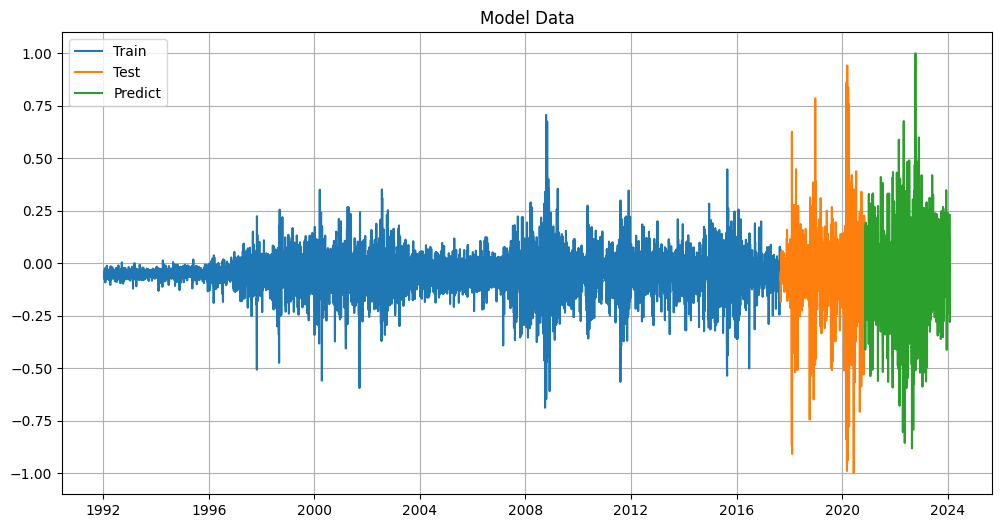

In [5]:
plt = config_chart('Model Data')
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.plot(dates_predict, y_predict)
plt.legend(['Train', 'Test', 'Predict'])

Epoch 1/400


202/202 - 5s - loss: 0.0081 - mean_absolute_error: 0.0608 - 5s/epoch - 23ms/step
Epoch 2/400
202/202 - 2s - loss: 0.0081 - mean_absolute_error: 0.0603 - 2s/epoch - 8ms/step
Epoch 3/400
202/202 - 2s - loss: 0.0080 - mean_absolute_error: 0.0602 - 2s/epoch - 7ms/step
Epoch 4/400
202/202 - 1s - loss: 0.0080 - mean_absolute_error: 0.0601 - 1s/epoch - 7ms/step
Epoch 5/400
202/202 - 1s - loss: 0.0080 - mean_absolute_error: 0.0601 - 1s/epoch - 7ms/step
Epoch 6/400
202/202 - 1s - loss: 0.0080 - mean_absolute_error: 0.0600 - 1s/epoch - 7ms/step
Epoch 7/400
202/202 - 1s - loss: 0.0080 - mean_absolute_error: 0.0600 - 1s/epoch - 7ms/step
Epoch 8/400
202/202 - 1s - loss: 0.0080 - mean_absolute_error: 0.0599 - 1s/epoch - 7ms/step
Epoch 9/400
202/202 - 1s - loss: 0.0080 - mean_absolute_error: 0.0600 - 1s/epoch - 7ms/step
Epoch 10/400
202/202 - 1s - loss: 0.0080 - mean_absolute_error: 0.0599 - 1s/epoch - 7ms/step
Epoch 11/400
202/202 - 2s - loss: 0.0080 - mean_absolute_error: 0.0600 - 2s/

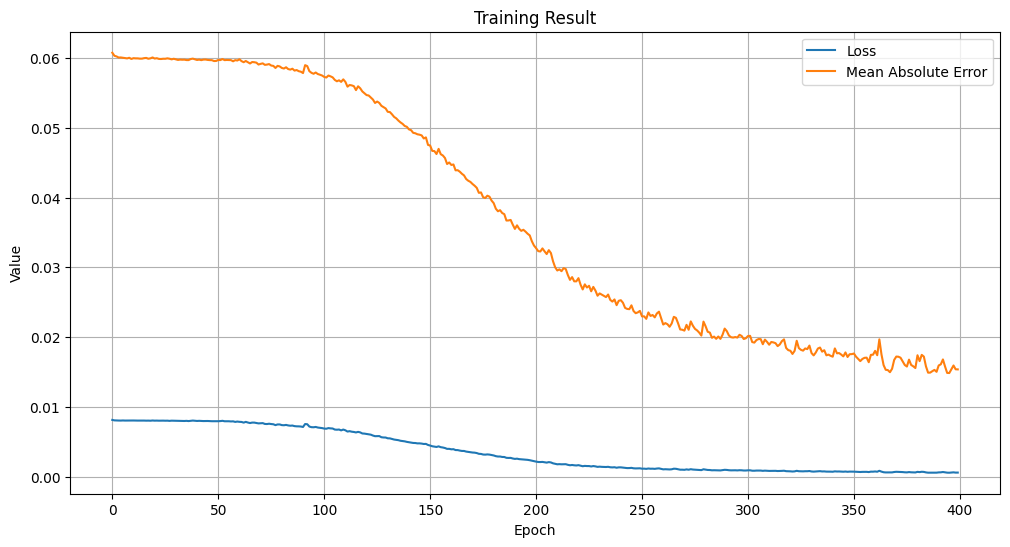

INFO:tensorflow:Assets written to: ./models/lstm_v1/lstm_model_v1\assets


INFO:tensorflow:Assets written to: ./models/lstm_v1/lstm_model_v1\assets


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)
plot_model_performance(fit_result)
save_lstm_model(model)

In [7]:
model = load_lstm_model()

26/26 [==============================] - 1s 3ms/step


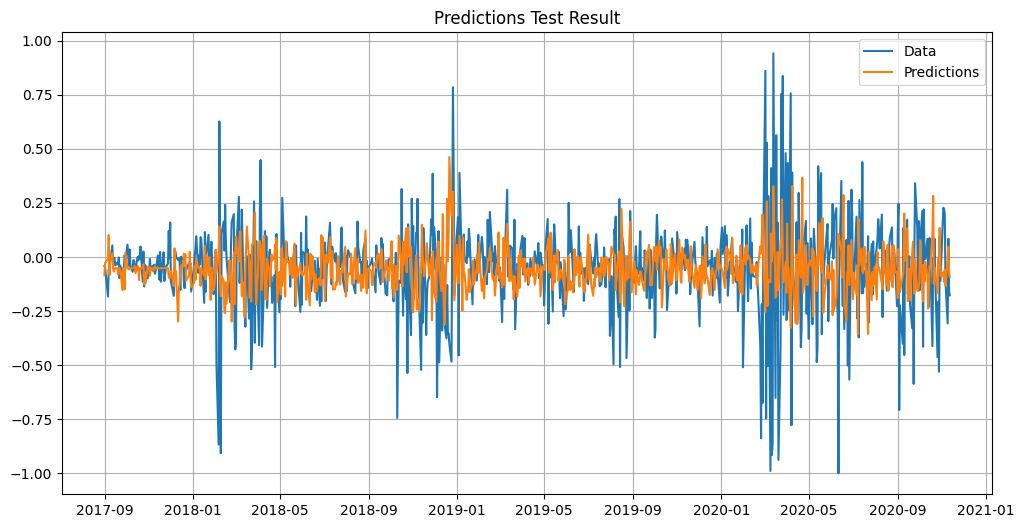

In [8]:
predictions = model.predict(x_test)

plt = config_chart('Predictions Test Result')
plt.plot(dates_test, y_test)
plt.plot(dates_test, predictions)
plt.legend(['Data', 'Predictions'])

26/26 [==============================] - 0s 3ms/step


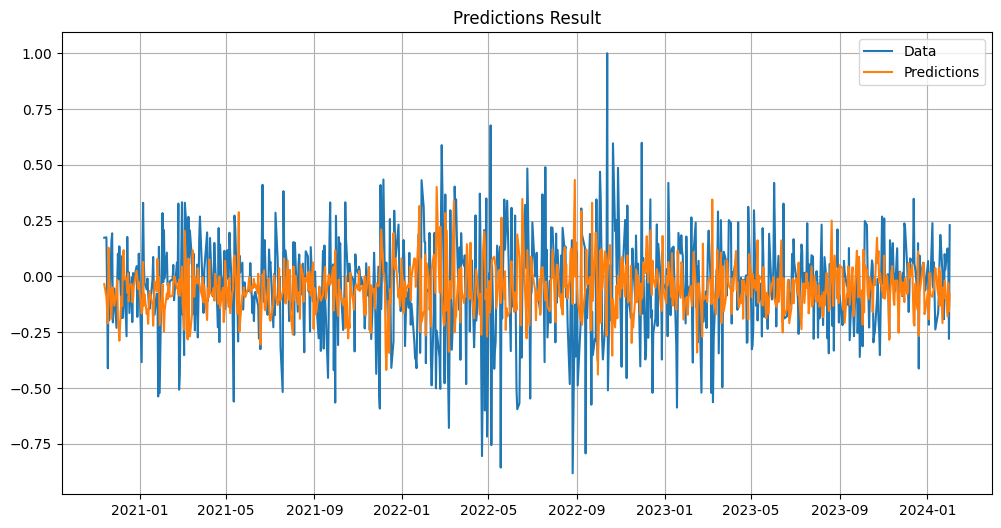

In [9]:
predictions = model.predict(x_predict)

plt = config_chart('Predictions Result')
plt.plot(dates_predict, y_predict)
plt.plot(dates_predict, predictions)
plt.legend(['Data', 'Predictions'])

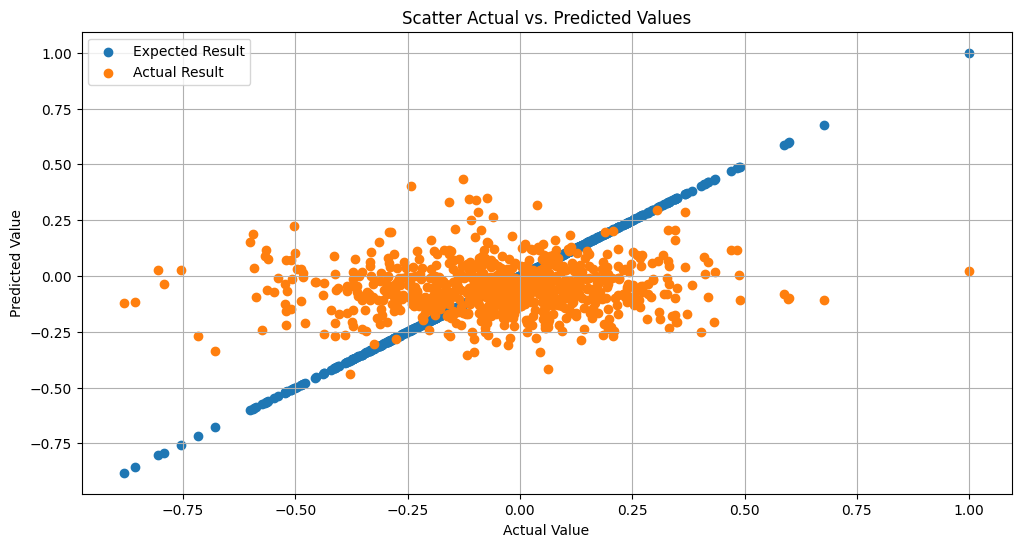

In [10]:
plot_scatter_data(y_predict, predictions)

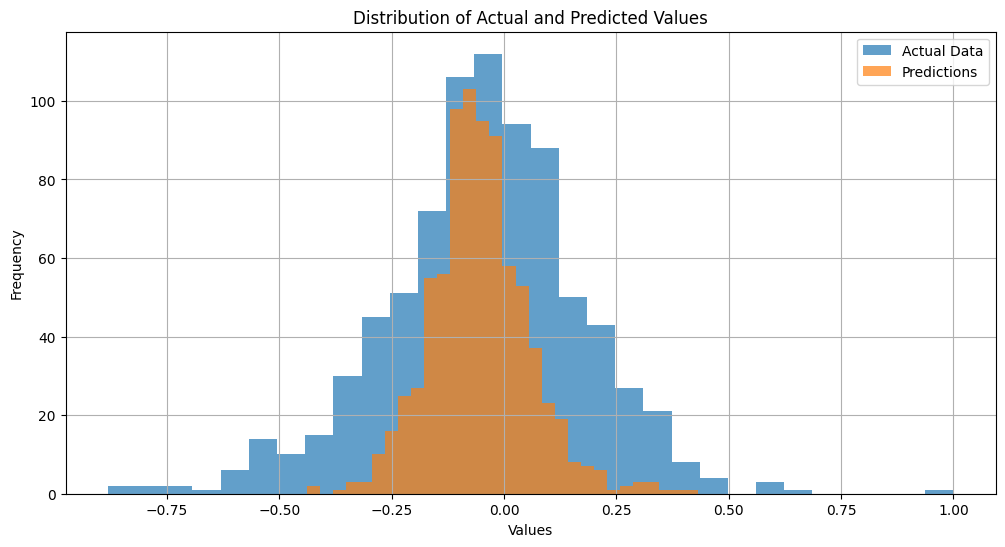

In [11]:
plot_distribution_data(y_predict, predictions)

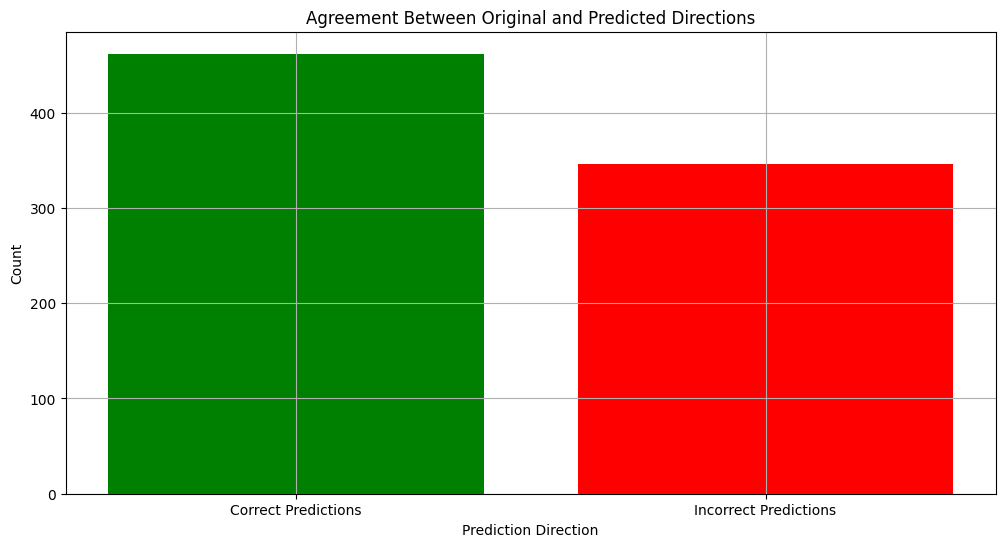

In [12]:
plot_direction_comparison(y_predict, predictions)